# Random Forest Regression

In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer


## Wstęp

Przeprowadź rozumowanie dla problemu regresji. Użyj w tym celu **sklearn.ensemble.RandomForestRegressor**.

* Wczytaj zaproponowany zbiór danych dotyczący cen mieszkań w Bostonie. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

I spróbuj przewidzieć ceny mieszkań na podstawie dostępnych zmiennych.

In [2]:
boston = load_boston()
all_x, all_y = boston.data, boston.target

* Stwórz obiekt RandomForestRegressor z domyślnymi parametrami i dopasuj go do danych (metoda .fit()).

In [3]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(all_x, all_y)

RandomForestRegressor()

* Sprawdźmy wynik na zbiorze uczącym używając metody .score().

Metoda ta zwraca domyślnie dla RandomForestRegressor wartość współczynnika determinacji R^2.

In [4]:
rf_regressor.score(all_x, all_y)

0.9816598902974031

* Możesz użyć metody .predict() żeby zwrócić predykcje. [:5] - ogranicza do pierwszych pięciu wyników

In [5]:
rf_regressor.predict(all_x[:5])

array([25.746, 21.952, 33.922, 33.747, 35.626])

## Praca domowa nr 13

Podziel zbiór na treningowy i testowy w proporcji 2:1 [10%]

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
type(boston.data)

numpy.ndarray

In [9]:
type(boston.target)

numpy.ndarray

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.33, random_state=42)

Stwórz nowy Forest Regressor z domyślnymi parametrami i dopasuj go do zbioru treningowego [10%]

In [11]:
rf = RandomForestRegressor(n_estimators = 6, max_depth=3, bootstrap=True, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=6, random_state=1)

In [12]:
rf.estimators_

[DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1791095845),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=2135392491),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=946286476),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1857819720),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=491263),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=550290313)]

Narysuj jedno drzewo tworzące powyższy las losowy, użyj atrybutu .estimators_ oraz funkcji plot_tree [10%]

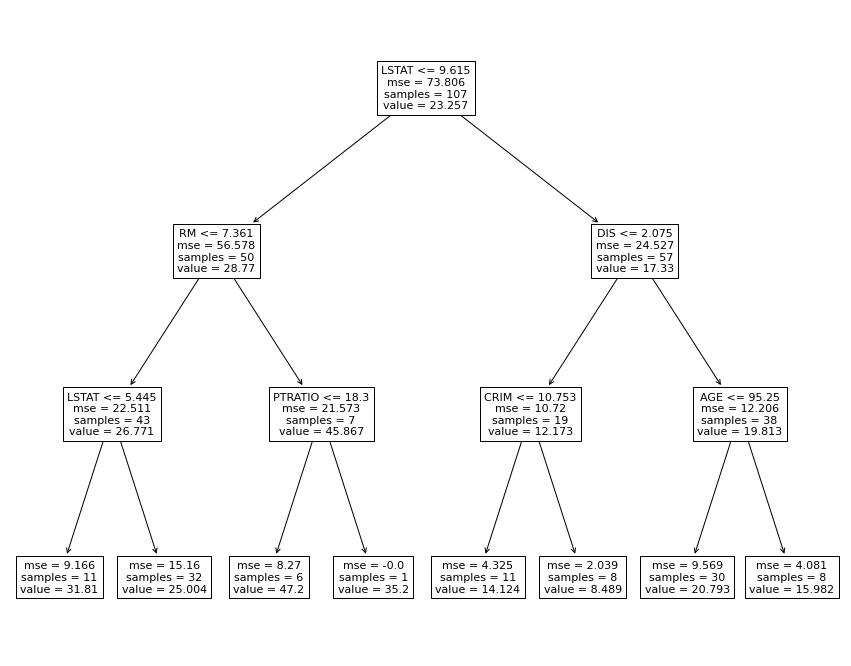

In [13]:
plt.figure(figsize = (15,12))
plot_tree(rf.estimators_[0], feature_names=boston.feature_names, class_names=boston.target);

Sprawdz score na danych testowych [10%]

In [14]:
rf.score(X_test, y_test)

0.7939639354598615

* Sprawdz jak zmienia się score gdy liczba estymatorów zmienia się od 1 do 100 (parametr n_estimators) [20%]

Narysuj wykres zależności wyniku od wartości parametru. Jakie masz wnioski?

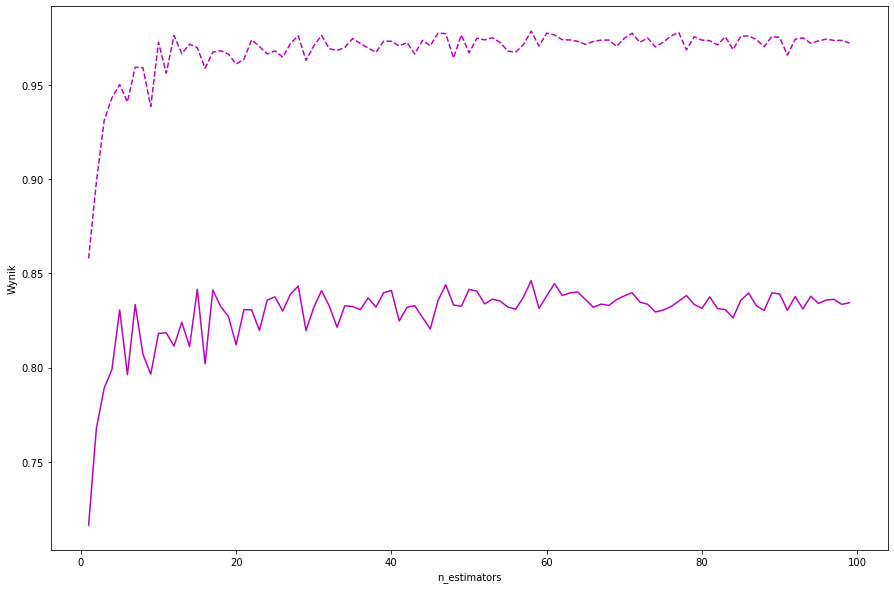

In [24]:
n_estimators = list(range(1,100))
rf_train_scores, rf_test_scores = [], []

for param in n_estimators:
    rf_est = RandomForestRegressor(n_estimators=param).fit(X_train, y_train)
    rf_train_scores.append(rf_est.score(X_train, y_train))
    rf_test_scores.append(rf_est.score(X_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.xlabel("n_estimators")
plt.ylabel("Wynik")

plt.plot(range(1,100, 1), rf_train_scores, 'm--')
plt.plot(range(1,100, 1), rf_test_scores, 'm')    

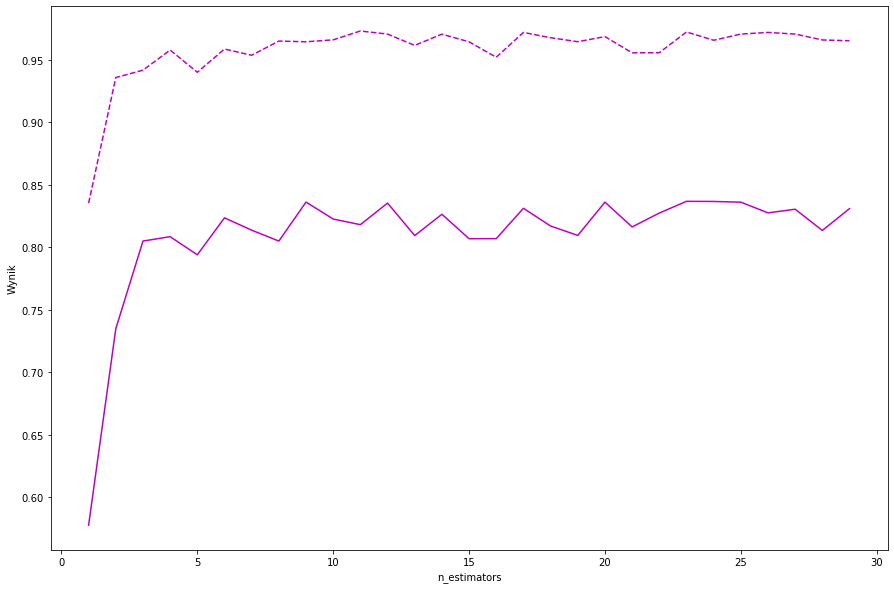

In [25]:
n_estimators = list(range(1,30))
rf_train_scores, rf_test_scores = [], []

for param in n_estimators:
    rf_est = RandomForestRegressor(n_estimators=param).fit(X_train, y_train)
    rf_train_scores.append(rf_est.score(X_train, y_train))
    rf_test_scores.append(rf_est.score(X_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.xlabel("n_estimators")
plt.ylabel("Wynik")

plt.plot(range(1,30, 1), rf_train_scores, 'm--')
plt.plot(range(1,30, 1), rf_test_scores, 'm')    

##### Wnioski: Niezależnie od ilości drzew model będzie przetrenowany, ponieważ różnce między zbiorem testowym a treningowym są dosyć wysokie

* Dopasuj model Random Forest z 80 estymatorami (parametr n_estimators) [20%]

Narysuj jak współczynnik R^2 zmienia się ze zmianą parametru `max_leaf_nodes` dla zbioru treningowego i testowego.

Użyj zakresu wartości: `range(2, 500, 10)`

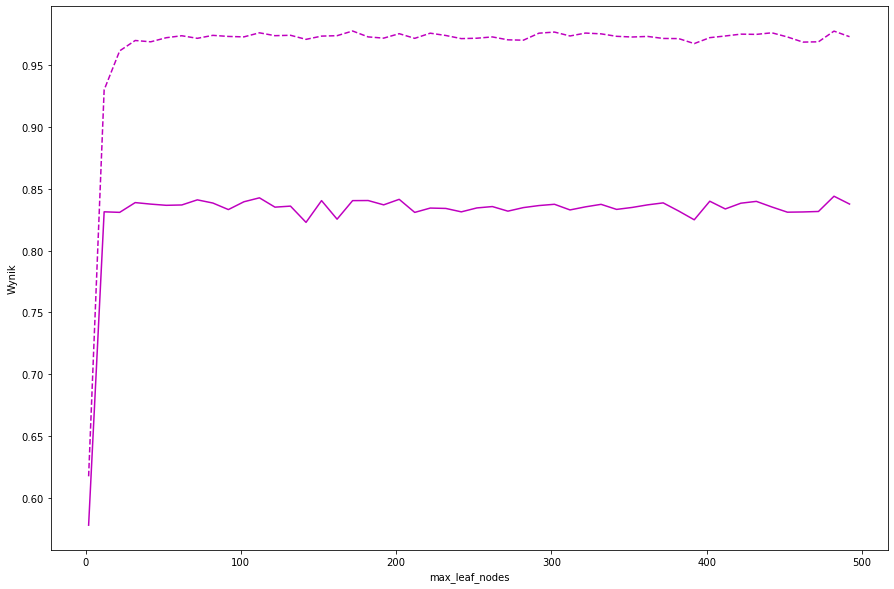

In [19]:
max_leaf_nodes = list(range(2, 500, 10))
rf_train_scores, rf_test_scores = [], []

for param in max_leaf_nodes:
    rf_lf = RandomForestRegressor(max_leaf_nodes = param).fit(X_train, y_train)
    rf_train_scores.append(rf_lf.score(X_train, y_train))
    rf_test_scores.append(rf_lf.score(X_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.xlabel("max_leaf_nodes")
plt.ylabel("Wynik")

plt.plot(range(2, 500, 10), rf_train_scores, 'm--')
plt.plot(range(2, 500, 10), rf_test_scores, 'm')  

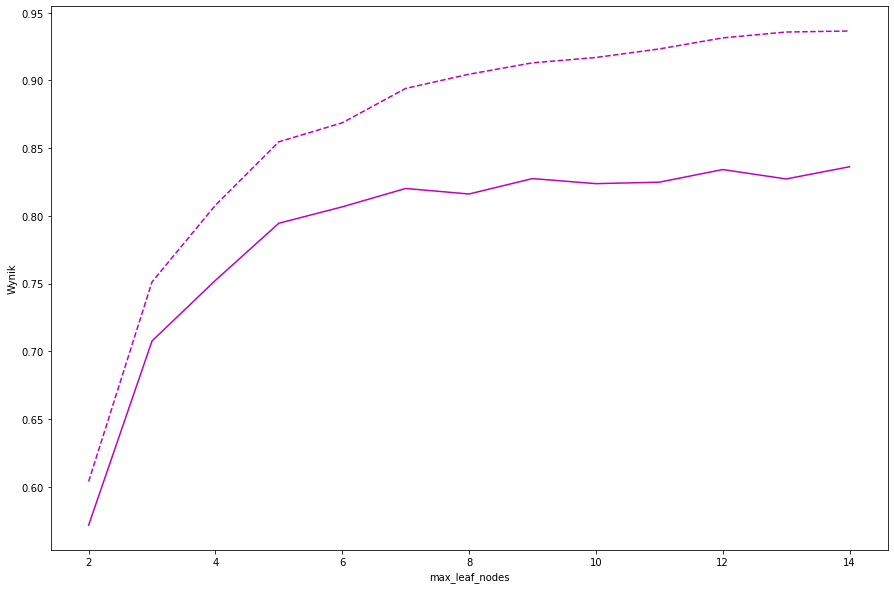

In [66]:
max_leaf_nodes = list(range(2, 15, 1))
rf_train_scores, rf_test_scores = [], []

for param in max_leaf_nodes:
    rf_lf = RandomForestRegressor(max_leaf_nodes = param).fit(X_train, y_train)
    rf_train_scores.append(rf_lf.score(_train, y_train))
    rf_test_scores.append(rf_lf.score(X_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.xlabel("max_leaf_nodes")
plt.ylabel("Wynik")

plt.plot(range(2, 15, 1), rf_train_scores, 'm--')
plt.plot(range(2, 15, 1), rf_test_scores, 'm') 

##### Najelpesze warości są w przedziale ok 8 - 10, powyżej model ma tendendencje do przetrenowania.

* Dobierz wybrane parametry korzystając z dowolnej metody optymalizacji hiperparametrów. [20%]

Ustal zakresy dla zmiennych:

`n_estimators`

`max_leaf_nodes`

`min_samples_split`

`min_samples_leaf`

Użyj 5-krotnej crosswalidacji.

Użyj domyślnej wartości parametru `scoring`.

In [26]:
def grid_combination(grid):
    total_params = 1 
    for par in grid:
        total_params  = total_params * len(grid[par])
    return total_params


param_grid = {"min_samples_split":list(range(1,6)),
              "max_leaf_nodes":[3, None],
              "n_estimators":[10,50,100,200],
              "min_samples_leaf":[1,3,5]}

print(param_grid)
print(f'Liczba wszystkich kombinacji: {grid_combination(param_grid)}')

{'min_samples_split': [1, 2, 3, 4, 5], 'max_leaf_nodes': [3, None], 'n_estimators': [10, 50, 100, 200], 'min_samples_leaf': [1, 3, 5]}
Liczba wszystkich kombinacji: 120


In [27]:
random_search = RandomizedSearchCV(rf,
                                   param_distributions=param_grid,
                                   cv=5,
                                   n_iter=10,
                                   verbose=1, 
                                   scoring=make_scorer(f1_score , average='macro'),
                                   random_state=99)
random_search.fit(features, targets)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/kingaklejne/opt/anaconda3/lib/p

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=3, n_estimators=6,
                                                   random_state=1),
                   param_distributions={'max_leaf_nodes': [3, None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=99,
                   scoring=make_scorer(f1_score, average=macro), verbose=1)

In [28]:
clf = RandomForestRegressor()

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, cv=4, n_iter=50, verbose=1)
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.62108584        nan        nan        nan 0.64927949 0.63555481
 0.64642917 0.64359587 0.77754273 0.64525989 0.64762161 0.6458682
 0.64215311 0.7732909         nan 0.7691311  0.7331471  0.76163265
 0.75670262 0.78040252 0.77359353 0.62712807 0.75334808 0.76454598
 0.74320357        nan 0.79191326 0.77387075 0.64882163 0.7722962
 0.64343108 0.75764805 0.6497914  0.7549847  0.62432399 0.63851255
 0.73630316 0.64757535 0.75765975 0.65268714 0.64772512 0.63730008
 0.6506964  0.7722186  0.77382862        nan 0.76514197 0.65277568
 0.75261953 0.64661481]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_leaf_nodes': [3, None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=1)

In [29]:
ranks = random_search.cv_results_['rank_test_score']
ranks.sort()
n = 5
for i in range(n):
    print(random_search.cv_results_['params'][ranks[i]])

{'n_estimators': 50, 'min_samples_split': 1, 'min_samples_leaf': 5, 'max_leaf_nodes': None}
{'n_estimators': 100, 'min_samples_split': 1, 'min_samples_leaf': 5, 'max_leaf_nodes': 3}
{'n_estimators': 200, 'min_samples_split': 1, 'min_samples_leaf': 5, 'max_leaf_nodes': None}
{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_leaf_nodes': 3}
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_leaf_nodes': 3}


In [30]:
param_grid2 = {"n_estimators": [5,15,35,45,55],
                "min_samples_split": [2,3,5,8,20],
              "max_leaf_nodes": [100,150,200,300],
              "min_samples_leaf": [3,5,8,15]}

In [31]:
clf = RandomForestRegressor()
grid_search = GridSearchCV(clf, param_grid=param_grid2, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': [100, 150, 200, 300],
                         'min_samples_leaf': [3, 5, 8, 15],
                         'min_samples_split': [2, 3, 5, 8, 20],
                         'n_estimators': [5, 15, 35, 45, 55]},
             verbose=1)

In [32]:
grid_search.best_params_

{'max_leaf_nodes': 300,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 15}

In [33]:
grid_search.best_score_ 

0.8072249862264458

In [34]:
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)
print('Wynik na zbiorze testowym: ', model.score(X_test, y_test))

Wynik na zbiorze testowym:  0.8094698860884114
